<a href="https://colab.research.google.com/github/hduongck/AI-ML-Learning/blob/master/Fastai%20NLP%20course/Topic%20Modelling/Topic_Modelling_1_Latent_Semantic_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text Mining 101: A Stepwise Introduction to Topic Modeling using Latent Semantic Analysis

https://www.analyticsvidhya.com/blog/2018/10/stepwise-guide-topic-modeling-latent-semantic-analysis/


## Introduction
Have you ever been inside a well-maintained library? I’m always incredibly impressed with the way the librarians keep everything organized, by name, content, and other topics. But if you gave these librarians thousands of books and asked them to arrange each book on the basis of their genre, they will struggle to accomplish this task in a day, let alone an hour!

However, this won’t happen to you if these books came in a digital format, right? All the arrangement seems to happen in a matter of seconds, without requiring any manual effort. All hail Natural Language Processing (NLP).

Have a look at the below text snippet:

![alt text](https://i2.wp.com/s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/09/Screenshot_1.png?resize=636%2C231&ssl=1)

As you might gather from the highlighted text, there are three topics (or concepts) – Topic 1, Topic 2, and Topic 3. A good topic model will identify similar words and put them under one group or topic. The most dominant topic in the above example is Topic 2, which indicates that this piece of text is primarily about fake videos.

Intrigued, yet? Good! In this article, we will learn about a text mining approach called Topic Modeling. It is an extremely useful technique for extracting topics, and one you will work with a lot when faced with NLP challenges.

Note: I highly recommend going through [this article](https://www.analyticsvidhya.com/blog/2018/08/dimensionality-reduction-techniques-python/) to understand terms like SVD and UMAP. They are leveraged in this article so having a basic understanding of them will help solidify these concepts. We have a [paid NLP course](https://trainings.analyticsvidhya.com/courses/course-v1:AnalyticsVidhya+NLP101+2018_T1/about?utm_source=blog&utm_medium=stepwise-guide-topic-modeling-latent-semantic-analysis) as well with a dedicated module for Topic Modeling.


## Table of Contents

1. What is a Topic Model?
2. When is Topic Modeling used?
3. Overview of Latent Semantic Analysis (LSA)
4. Implementation of LSA in Python
    - Data Reading and Inspection
    - Data Preprocessing
    - Document-Term Matrix
    - Topic Modeling
    - Topics Visualization
5. Pros and Cons of LSA
6. Other Techniques for Topic Modeling



## 1. What is a topic model?
**A Topic Model can be defined as an unsupervised technique to discover topics across various text documents**. These topics are abstract in nature, i.e., words which are related to each other form a topic. Similarly, there can be multiple topics in an individual document. For the time being, let’s understand a topic model as a black box, as illustrated in the below figure:

![alt text](https://i0.wp.com/s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/09/Screenshot_2.png?resize=602%2C386&ssl=1)

This black box (topic model) forms clusters of similar and related words which are called topics. These topics have a certain distribution in a document, and every topic is defined by the proportion of different words it contains.





## 2. When is Topic Modeling used?
Recall the example we saw earlier of arranging similar books together. Now suppose you have to perform a similar task with a few digital text documents. You would be able to manually accomplish this, as long as the number of documents is manageable (aka not too many of them). But what happens when there’s an impossible number of these digital text documents?

That’s where NLP techniques come to the fore. And for this particular task, topic modeling is the technique we will turn to.

![alt text](https://i1.wp.com/s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/09/Screenshot_3.png?resize=391%2C337&ssl=1)

Topic modeling helps in exploring large amounts of text data, finding clusters of words, similarity between documents, and discovering abstract topics. As if these reasons weren’t compelling enough, topic modeling is also used in search engines wherein the search string is matched with the results. Getting interesting, isn’t it? Well, read on then!



## 3. Overview of Latent Semantic Analysis (LSA)
All languages have their own intricacies and nuances which are quite difficult for a machine to capture (sometimes they’re even misunderstood by us humans!). This can include different words that mean the same thing, and also the words which have the same spelling but different meanings.

For example, consider the following two sentences:

- I liked his last novel quite a lot.
- We would like to go for a novel marketing campaign.

In the first sentence, the word ‘novel’ refers to a book, and in the second sentence it means new or fresh.

We can easily distinguish between these words because we are able to understand the context behind these words. However, a machine would not be able to capture this concept as it cannot understand the context in which the words have been used. This is where Latent Semantic Analysis (LSA) comes into play as it attempts to leverage the context around the words to capture the hidden concepts, also known as topics.

So, simply mapping words to documents won’t really help. What we really need is to figure out the hidden concepts or topics behind the words. LSA is one such technique that can find these hidden topics. Let’s now deep dive into the inner workings of LSA.

## 4. Steps involved in the implementation of LSA

Let’s say we have **m** number of text documents with **n** number of total unique terms (words). We wish to extract **k** topics from all the text data in the documents. The number of topics, **k**, has to be specified by the user.

- Generate a document-term matrix of shape **m x n** having TF-IDF scores.

![alt text](https://i0.wp.com/s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/09/Screenshot_4.png?resize=555%2C224&ssl=1)

- Then, we will reduce the dimensions of the above matrix to **k** (no. of desired topics) dimensions, using singular-value decomposition (SVD).

- SVD decomposes a matrix into three other matrices. Suppose we want to decompose a matrix A using SVD. It will be decomposed into matrix U, matrix S, and $V^T$ (transpose of matrix V).

![alt text](https://i0.wp.com/s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/09/Screenshot_6.png?resize=212%2C69&ssl=1)

![alt text](https://i1.wp.com/s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/09/Screenshot_7.png?resize=700%2C254&ssl=1)

Each row of the matrix $U_k$ (**document-term matrix**) is the vector representation of the corresponding document. The length of these vectors is k, which is the number of desired topics. Vector representation for the terms in our data can be found in the matrix $V_k$ (**term-topic matrix**).

- So, SVD gives us vectors for every document and term in our data. The length of each vector would be k. We can then use these vectors to find similar words and similar documents using the cosine similarity method.

## 4. Implementation of LSA in Python

It’s time to power up Python and understand how to implement LSA in a topic modeling problem. Once your Python environment is open, follow the steps I have mentioned below.

### Data reading and inspection
Let’s load the required libraries before proceeding with anything else.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_colwidth',200)

In this article, we will use the ’20 Newsgroup’ dataset from sklearn. You can download the dataset here, and follow along with the code.

In [2]:
from sklearn.datasets import fetch_20newsgroups

dataset = fetch_20newsgroups(shuffle=True, random_state=1,remove=('headers','footers','quotes'))
documents = dataset.data
len(documents)

11314

In [3]:
dataset.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

The dataset has 11,314 text documents distributed across 20 different newsgroups.

### Data Preprocessing
To start with, we will try to clean our text data as much as possible. The idea is to remove the punctuations, numbers, and special characters all in one step using the regex replace(“[^a-zA-Z#]”, ” “), which will replace everything, except alphabets with space. Then we will remove shorter words because they usually don’t contain useful information. Finally, we will make all the text lowercase to nullify case sensitivity.

In [0]:
news_df = pd.DataFrame({'document':documents})

#removing everything except alphabets
news_df['clean_doc'] = news_df['document'].str.replace("[^a-zA-Z#]"," ")

#removing short words
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 3]))

#make all text lower case
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: x.lower())

It’s good practice to remove the stop-words from the text data as they are mostly clutter and hardly carry any information. Stop-words are terms like ‘it’, ‘they’, ‘am’, ‘been’, ‘about’, ‘because’, ‘while’, etc.

To remove stop-words from the documents, we will have to tokenize the text, i.e., split the string of text into individual tokens or words. We will stitch the tokens back together once we have removed the stop-words.

In [7]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

# tokenization
tokenized_doc = news_df['clean_doc'].apply(lambda x: x.split())

#remove stop-words
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])

#de-tokenization

detokenized_doc = []
for i in range(len(news_df)):
    t = ' '.join(tokenized_doc[i])
    detokenized_doc.append(t)

news_df['clean_doc'] = detokenized_doc

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Document-Term Matrix
This is the first step towards topic modeling. We will use sklearn’s TfidfVectorizer to create a document-term matrix with 1,000 terms.

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english',
                             #max_features = 1000, # keep top 1000 terms
                             max_df = 0.5,
                             smooth_idf = True)

X = vectorizer.fit_transform(news_df['clean_doc'])

X.shape # check the shape of the document-term matrix

(11314, 64741)

We could have used all the terms to create this matrix but that would need quite a lot of computation time and resources. Hence, we have restricted the number of features to 1,000. If you have the computational power, I suggest trying out all the terms.

### Topic Modeling
The next step is to represent each and every term and document as a vector. We will use the document-term matrix and decompose it into multiple matrices. We will use sklearn’s **TruncatedSVD** to perform the task of matrix decomposition.

Since the data comes from 20 different newsgroups, let’s try to have 20 topics for our text data. The number of topics can be specified by using the n_components parameter.

In [11]:
from sklearn.decomposition import TruncatedSVD

#SVD represent documents and terms in vectors
svd_model = TruncatedSVD(n_components=20, algorithm='randomized', n_iter=100, random_state=122)

svd_model.fit(X)

len(svd_model.components_)

20

The components of svd_model are our topics, and we can access them using svd_model.components_. Finally, let’s print a few most important words in each of the 20 topics and see how our model has done.

In [12]:
terms = vectorizer.get_feature_names()

for i , comp in enumerate(svd_model.components_):
    terms_comp = zip(terms,comp)
    sorted_terms = sorted(terms_comp, key = lambda x:x[1], reverse=True)[:7]
    print("Topic "+str(i)+": ")
    for t in sorted_terms:
        print(t[0])
    print(" ")


Topic 0: 
know
 
like
 
people
 
think
 
good
 
time
 
thanks
 
Topic 1: 
windows
 
thanks
 
drive
 
card
 
file
 
scsi
 
video
 
Topic 2: 
drive
 
scsi
 
drives
 
hard
 
controller
 
disk
 
floppy
 
Topic 3: 
game
 
team
 
games
 
year
 
players
 
season
 
thanks
 
Topic 4: 
chip
 
encryption
 
clipper
 
government
 
keys
 
escrow
 
data
 
Topic 5: 
pitt
 
cadre
 
chastity
 
shameful
 
intellect
 
skepticism
 
surrender
 
Topic 6: 
thanks
 
mail
 
know
 
advance
 
info
 
email
 
address
 
Topic 7: 
card
 
video
 
monitor
 
cards
 
drivers
 
chip
 
driver
 
Topic 8: 
know
 
thanks
 
windows
 
chip
 
scsi
 
encryption
 
game
 
Topic 9: 
israel
 
armenian
 
armenians
 
israeli
 
turkish
 
people
 
jews
 
Topic 10: 
know
 
like
 
bike
 
problem
 
window
 
going
 
think
 
Topic 11: 
window
 
scsi
 
problem
 
israel
 
server
 
motif
 
display
 
Topic 12: 
space
 
scsi
 
card
 
nasa
 
know
 
file
 
shuttle
 
Topic 13: 
scsi
 
windows
 
people
 
version
 
window
 
thanks
 
list
 
Topic 14: 
i

### Topics Visualization
To find out how distinct our topics are, we should visualize them. Of course, we cannot visualize more than 3 dimensions, but there are techniques like PCA and t-SNE which can help us visualize high dimensional data into lower dimensions. Here we will use a relatively new technique called UMAP (Uniform Manifold Approximation and Projection).

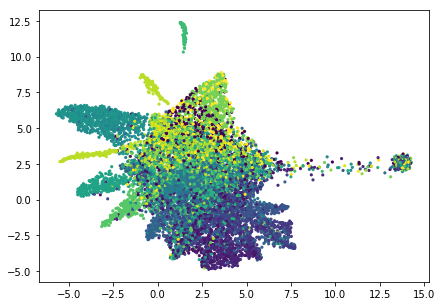

In [13]:
import umap

X_topics = svd_model.fit_transform(X)
embedding = umap.UMAP(n_neighbors=150, min_dist=0.5, random_state=12).fit_transform(X_topics)

plt.figure(figsize=(7,5))
plt.scatter(embedding[:, 0], embedding[:, 1], 
c = dataset.target,
s = 10, # size
edgecolor='none'
)
plt.show()

As you can see above, the result is quite beautiful. Each dot represents a document and the colours represent the 20 newsgroups. Our LSA model seems to have done a good job. Feel free to play around with the parameters of UMAP to see how the plot changes its shape.

## 5. Pros and Cons of LSA
Latent Semantic Analysis can be very useful as we saw above, but it does have its limitations. It’s important to understand both the sides of LSA so you have an idea of when to leverage it and when to try something else.

**Pros:**

- LSA is fast and easy to implement.
- It gives decent results, much better than a plain vector space model.

**Cons:**

- Since it is a linear model, it might not do well on datasets with non-linear dependencies.
- LSA assumes a Gaussian distribution of the terms in the documents, which may not be true for all problems.
- LSA involves SVD, which is computationally intensive and hard to update as new data comes up.

## 6. Other Techniques for Topic Modeling

Apart from LSA, **there are other advanced and efficient topic modeling techniques such as Latent Dirichlet Allocation (LDA) and lda2Vec**. We have a wonderful article on LDA which you can check out here. lda2vec is a much more advanced topic modeling which is based on word2vec word embeddings. If you want to find out more about it, let me know in the comments section below and I’ll be happy to answer your questions/.